# GEC Data Science Program
## Level 1, Labs 4 & 5

Contents

#### [Lab  4](#Lab-4)
- [Classification](#Classification)
- [Evaluation](#Evaluation)
- [ROC Curve](#ROC-curve)
- [Clustering](#Clustering)

#### [Lab  5](#Lab-5)
- [Feature-Selection](#Feature-Selection)
- [Model-Selection](#Model-Selection)
- [Parameter-Tuning](#Parameter-Tuning)
- [Pipeline](#Pipeline)

### Imports

In [98]:
# from __future__ import division
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn import model_selection, linear_model

In [99]:
from sklearn import svm, model_selection, metrics

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
%matplotlib inline

### Data Loading

In [103]:
data_path="./"
df = pd.read_csv(data_path+"train.csv", index_col=0)

In [104]:
data_path="./"
d = pd.read_csv(data_path+"train_clean.csv", index_col=0)

In [105]:
d.head()

,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Age,Survived
PassengerId,,,,,,,,,,
1,0.432550,-0.473408,-0.879247,1.0,0.0,1.0,0.0,1.0,22.0,0
2,0.432550,-0.473408,1.360456,0.0,0.0,0.0,0.0,0.0,38.0,1
3,-0.474279,-0.473408,-0.798092,0.0,0.0,1.0,0.0,1.0,26.0,1
4,0.432550,-0.473408,1.061442,0.0,0.0,0.0,0.0,1.0,35.0,1
5,-0.474279,-0.473408,-0.783739,1.0,0.0,1.0,0.0,1.0,35.0,0


In [106]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
target = 'Survived'
features = list(d.columns.drop(target))

In [108]:
features

['SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Pclass_2',
 'Pclass_3',
 'Embarked_Q',
 'Embarked_S',
 'Age']

In [109]:
# target = 'Survived'
# df_features = list(df.columns.drop([target,'Ticket','Name','Cabin']))

In [67]:
# if target in features:
#     features.pop(features.index(target))

In [68]:
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [110]:
# d=pd.get_dummies(df[features],dummy_na=True,drop_first=True,columns=['Sex','Embarked']).fillna(0)

In [111]:
# d.head()

In [113]:
X=d[features]
y=df[target]

In [115]:
X.head()

,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,
1,0.432550,-0.473408,-0.879247,1.0,0.0,1.0,0.0,1.0,22.0
2,0.432550,-0.473408,1.360456,0.0,0.0,0.0,0.0,0.0,38.0
3,-0.474279,-0.473408,-0.798092,0.0,0.0,1.0,0.0,1.0,26.0
4,0.432550,-0.473408,1.061442,0.0,0.0,0.0,0.0,1.0,35.0
5,-0.474279,-0.473408,-0.783739,1.0,0.0,1.0,0.0,1.0,35.0


In [116]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Data Splitting

In [118]:
train_idx, test_idx = model_selection.train_test_split(d.index, test_size = 0.2)

In [119]:
X_train = X.loc[train_idx]
X_test  = X.loc[test_idx]
y_train = y.loc[train_idx]
y_test  = y.loc[test_idx]

In [121]:
X_train.shape

(712, 9)

In [122]:
X_test.shape

(179, 9)

# Lab 4

In this lab our goal is to create models to predict which passengers survived Titanic disaster.

## Classification

### Logistic Regression

In [15]:
lr = linear_model.LogisticRegression()

In [16]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_fit = lr.predict(X_train)
y_pred = lr.predict(X_test)

### Decision Tree

In [168]:
dt = DecisionTreeClassifier(max_depth=3)

In [169]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [170]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
y_fit = dt.predict(X_train)

In [196]:
y_pred = dt.predict(X_test)

In [197]:
# predictions
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [198]:
#actual
y_test.values

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [175]:
# !pip install pydotplus

Also install GraphViz, and add it to the PATH

https://www.graphviz.org/download/

In [176]:
# !setx PATH "%PATH%;C:\Program Files (x86)\Graphviz2.38\bin"
# !echo %PATH%

In [177]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 

In [178]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  feature_names=X.columns,
                filled=True, rounded=True,
                special_characters=True)

In [179]:
X_train.columns

Index(['SibSp', 'Parch', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Age'],
      dtype='object')

In [180]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

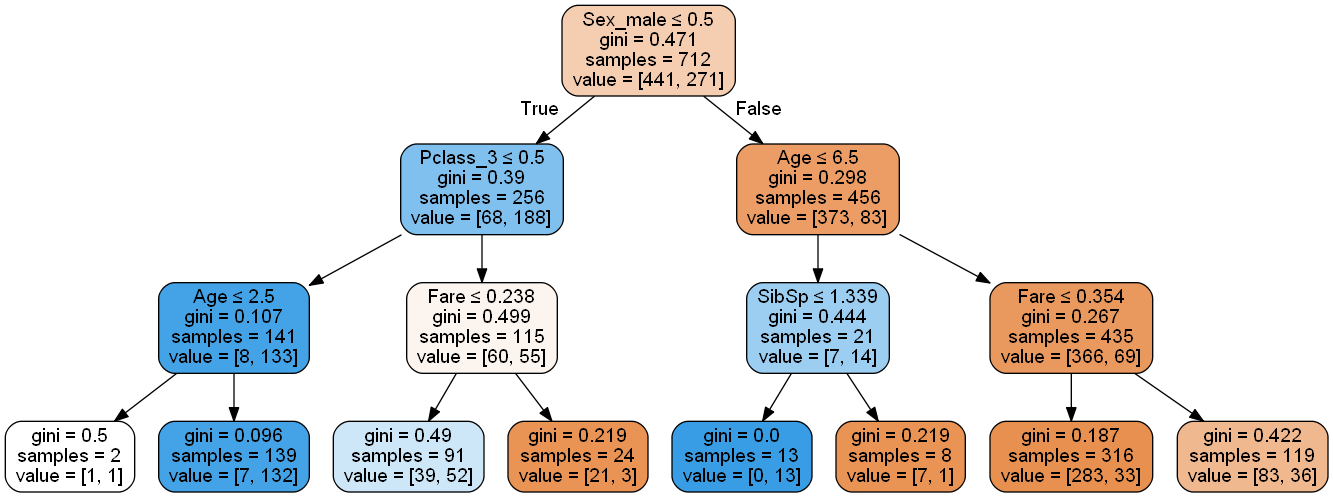

In [181]:
Image(graph.create_png())

## Evaluation

### Q: How do we evaluate a classifier?

In [182]:
from sklearn import metrics

In [199]:
print (metrics.accuracy_score(y_test, y_pred))

0.810055865922


In [200]:
len(y_test)

179

In [201]:
true = y_test == y_pred

In [202]:
false = y_test != y_pred

In [203]:
sum(true), sum(false)

(145, 34)

In [204]:
TP = sum(true &  (y_pred == 1))
TN = sum(true &  (y_pred == 0))

In [205]:
FP = sum(false & (y_pred == 1))
FN = sum(false & (y_pred == 0))

In [206]:
print (TN, FP)
print (FN, TP)

98 10
24 47


In [207]:
print ("precision (positive predictive value):", TP/(TP+FP))

precision (positive predictive value): 0.824561403509


In [208]:
print ("recall (sensitivity, true positive rate):", TP/(TP+FN))

recall (sensitivity, true positive rate): 0.661971830986


In [209]:
print ("specificity (true negative rate):",TN/(TN+FP))

specificity (true negative rate): 0.907407407407


In [210]:
print ("False Negative Rate:",FN/(TP+FN))

False Negative Rate: 0.338028169014


In [211]:
print ("False Positive Rate:",FP/(FP+TN))

False Positive Rate: 0.0925925925926


Usefull information: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [212]:
print (metrics.confusion_matrix(y_test, y_pred, labels=[0, 1]))

[[98 10]
 [24 47]]


In [213]:
print (metrics.classification_report(y_test, y_pred, target_names=['Died','Survived']))

             precision    recall  f1-score   support

       Died       0.80      0.91      0.85       108
   Survived       0.82      0.66      0.73        71

avg / total       0.81      0.81      0.81       179



In [214]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

### Q: The above predictions are based on the default threshold of 0.5. How can we change the threshold?

Hint: Generate prediction probabilities (y_pred_prob) using predict_proba() function.

In [217]:
y_pred_prob = dt.predict_proba(X_test) [:,1]

In [219]:
y_pred_prob

array([ 0.94964029,  0.10443038,  0.30252101,  0.94964029,  0.10443038,
        0.94964029,  0.10443038,  0.94964029,  0.10443038,  0.57142857,
        0.94964029,  0.30252101,  0.10443038,  0.57142857,  0.10443038,
        0.10443038,  0.10443038,  0.10443038,  0.10443038,  0.94964029,
        0.30252101,  0.57142857,  0.10443038,  0.10443038,  0.94964029,
        0.10443038,  0.94964029,  0.30252101,  0.57142857,  0.57142857,
        0.94964029,  0.10443038,  0.10443038,  0.10443038,  0.125     ,
        0.30252101,  0.10443038,  0.94964029,  0.30252101,  0.94964029,
        0.10443038,  0.10443038,  0.57142857,  0.10443038,  0.30252101,
        0.94964029,  0.10443038,  0.94964029,  0.10443038,  0.94964029,
        0.10443038,  0.10443038,  0.94964029,  0.125     ,  0.10443038,
        0.125     ,  0.10443038,  0.30252101,  0.57142857,  0.57142857,
        0.57142857,  0.30252101,  0.10443038,  0.10443038,  0.10443038,
        0.10443038,  0.57142857,  0.94964029,  0.57142857,  0.94

### Q: Create the following 3 graphs. What can we learn from each?

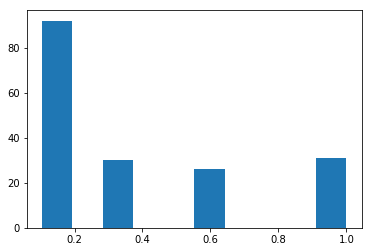

In [220]:
plt.hist(y_pred_prob);

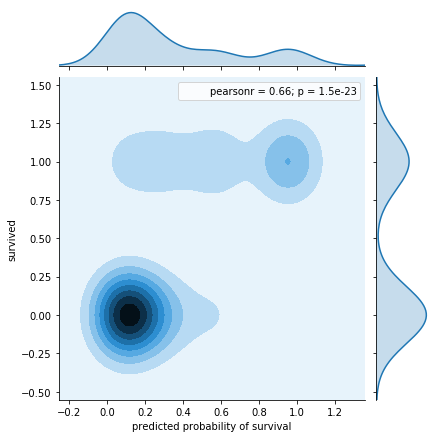

In [221]:
ax = sns.jointplot(y_pred_prob,y_test,kind="kde");
ax.set_axis_labels('predicted probability of survival','survived');

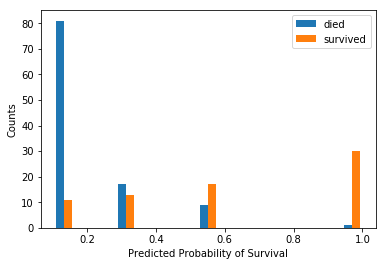

In [222]:
idx0 = y_test == 0
idx1 = y_test == 1
plt.hist([y_pred_prob[idx0], y_pred_prob[idx1]], bins=15);
plt.legend(['died','survived']);
plt.xlabel("Predicted Probability of Survival");
plt.ylabel("Counts");

### Q: How does the performance metrics change if we change threshold?

Try threshold values of 0.2, 0.5, 0.8 and print classification report for each.

In [234]:
thr = 0.0
y_pred = y_pred_prob > thr

print (metrics.classification_report(y_test, y_pred, target_names=['Died','Survived']))

             precision    recall  f1-score   support

       Died       0.00      0.00      0.00       108
   Survived       0.40      1.00      0.57        71

avg / total       0.16      0.40      0.23       179



C:\Users\Shahab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [235]:
thr = 0.2
y_pred = y_pred_prob > thr

print (metrics.classification_report(y_test, y_pred, target_names=['Died','Survived']))

             precision    recall  f1-score   support

       Died       0.88      0.75      0.81       108
   Survived       0.69      0.85      0.76        71

avg / total       0.80      0.79      0.79       179



In [236]:
thr = 0.5
y_pred = y_pred_prob > thr

print (metrics.classification_report(y_test, y_pred, target_names=['Died','Survived']))

             precision    recall  f1-score   support

       Died       0.80      0.91      0.85       108
   Survived       0.82      0.66      0.73        71

avg / total       0.81      0.81      0.81       179



### ROC curve

https://en.wikipedia.org/wiki/Receiver_operating_characteristic 

In [231]:
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_prob)

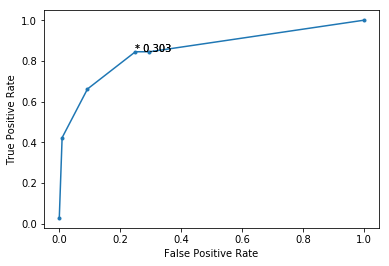

In [232]:
plt.plot(fpr, tpr,'.-');
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");
plt.text(fpr[3],tpr[3],"* %0.3f"%thr[3])
plt.text(fpr[-3],tpr[-3],"* %0.3f"%thr[-3])

In [237]:
auc = metrics.auc(fpr, tpr)
print ("AUC:",auc)

AUC: 0.854199269692


### Scatter plot visualization of true and false predictions

In [238]:
from sklearn import decomposition

pca = decomposition.PCA()
X_pca = pca.fit_transform(X)
tst_pca = X_pca[test_idx-1]

o: survived
x: died
red: predicted survived
purple: predicted dead
TP: red O
TN: purple X


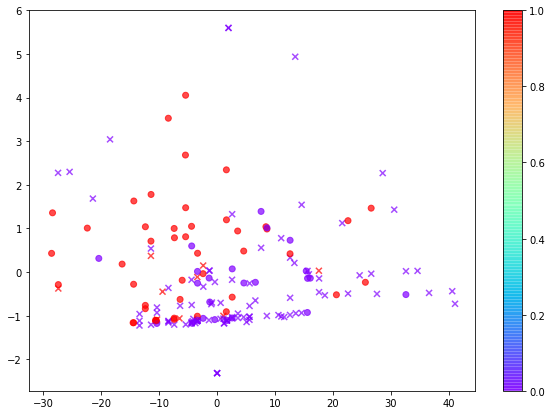

In [239]:
thr = 0.5
y_pred = y_pred_prob > thr
plt.figure(figsize=(10,7))
plt.scatter(tst_pca[y_test==0,0],tst_pca[y_test==0,1], marker='x', c=y_pred[y_test==0], 
            cmap=plt.cm.rainbow, alpha=0.7);
plt.scatter(tst_pca[y_test==1,0],tst_pca[y_test==1,1], marker='o', c=y_pred[y_test==1], 
            cmap=plt.cm.rainbow, alpha=0.7);
plt.colorbar();
print ("o: survived")
print ("x: died")
print ("red: predicted survived")
print ("purple: predicted dead")
print ("TP: red O")
print ("TN: purple X")

### Support Vector Machines (SVM)

In [240]:
from sklearn import svm

In [241]:
svm_model = svm.SVC()

In [242]:
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [243]:
y_pred = svm_model.predict(X_test)

In [244]:
print (metrics.classification_report(y_test, y_pred, target_names=['Died','Survived']))

             precision    recall  f1-score   support

       Died       0.78      0.91      0.84       108
   Survived       0.81      0.62      0.70        71

avg / total       0.80      0.79      0.79       179



In [245]:
y_pred_score = svm_model.decision_function(X_test)

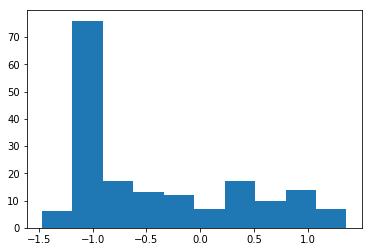

In [246]:
plt.hist(y_pred_score);

In [247]:
y_pred_prob2 = (y_pred_score - min(y_pred_score))/(max(y_pred_score)-min(y_pred_score))

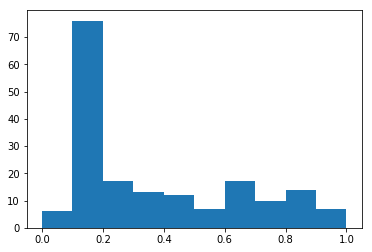

In [248]:
plt.hist(y_pred_prob2);

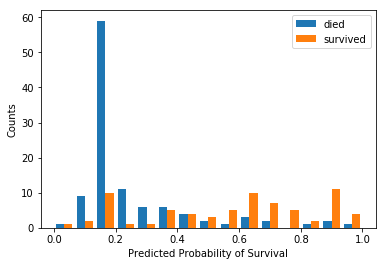

In [249]:
idx0 = y_test == 0
idx1 = y_test == 1
plt.hist([y_pred_prob2[idx0], y_pred_prob2[idx1]], bins=15);
plt.legend(['died','survived']);
plt.xlabel("Predicted Probability of Survival");
plt.ylabel("Counts");

In [250]:
fpr2, tpr2, thr2 = metrics.roc_curve(y_test, y_pred_prob2)

In [251]:
auc2 = metrics.auc(fpr2,tpr2)

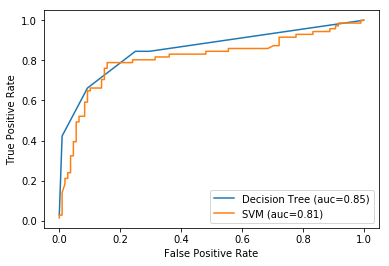

In [253]:
plt.plot(fpr, tpr);
plt.plot(fpr2, tpr2);
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");

plt.legend(["Decision Tree (auc=%0.2f)"%auc,"SVM (auc=%0.2f)"%auc2]);

In [254]:
print ("AUC:",auc2)

AUC: 0.809533124674


### Random Forest

### *Q: Create ROC curve for a Random Forest model and compare with the other two.

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
rf = RandomForestClassifier(max_depth=3, n_estimators=1000)

In [274]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [275]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [276]:
y_pred_rf = rf.predict(X_test)

In [277]:
print(metrics.classification_report(y_pred_rf, y_test))

             precision    recall  f1-score   support

          0       0.96      0.78      0.86       134
          1       0.58      0.91      0.71        45

avg / total       0.87      0.81      0.82       179



In [284]:
y_pred_prob3 = rf.predict_proba(X_test)[:,1]

In [286]:
# y_pred_prob3

In [287]:
fpr3, tpr3, thr3 = metrics.roc_curve(y_test, y_pred_prob3)

In [288]:
auc3 = metrics.auc(fpr3,tpr3)

In [289]:
auc3

0.84904799165362543

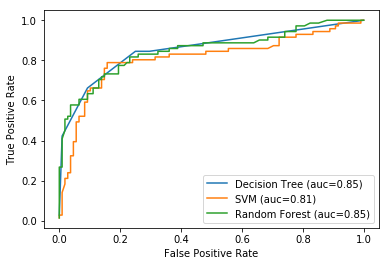

In [292]:
plt.plot(fpr, tpr);
plt.plot(fpr2, tpr2);
plt.plot(fpr3, tpr3);
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");
plt.legend(["Decision Tree (auc=%0.2f)"%auc,"SVM (auc=%0.2f)"%auc2, "Random Forest (auc=%0.2f)"%auc3]);

## Clustering

http://scikit-learn.org/stable/modules/clustering.html

In [293]:
from sklearn import cluster

### Kmeans

In [294]:
km = cluster.KMeans(n_clusters=2, tol=1e-99, max_iter=999, verbose=0)

In [295]:
km.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=999,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-99, verbose=0)

In [296]:
y_km = km.fit_predict(X_test)

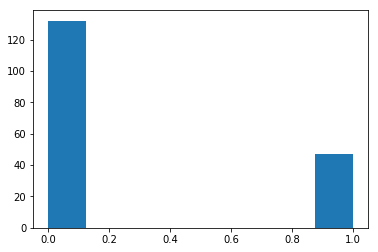

In [297]:
plt.hist(y_km,bins=8);

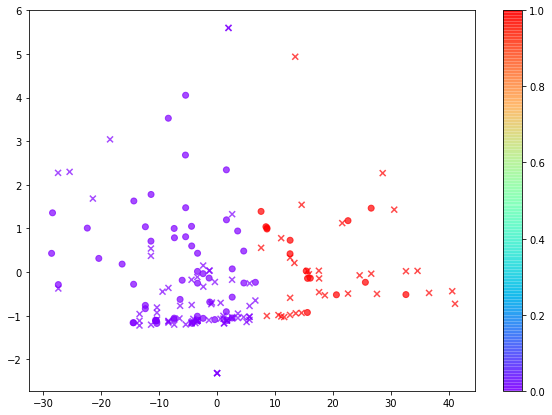

In [298]:
plt.figure(figsize=(10,7))
plt.scatter(tst_pca[y_test==0,0],tst_pca[y_test==0,1], marker='x', c=y_km[y_test==0], cmap=plt.cm.rainbow, alpha=0.7);
plt.scatter(tst_pca[y_test==1,0],tst_pca[y_test==1,1], marker='o', c=y_km[y_test==1], cmap=plt.cm.rainbow, alpha=0.7);
plt.colorbar();

### DBSCAN

In [299]:
dbs = cluster.DBSCAN(1)

In [300]:
y_dbs = dbs.fit_predict(X_test)

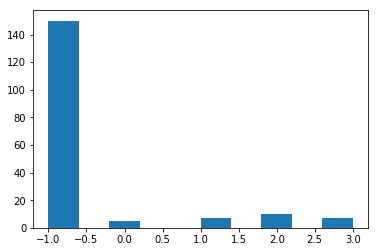

In [301]:
plt.hist(y_dbs);

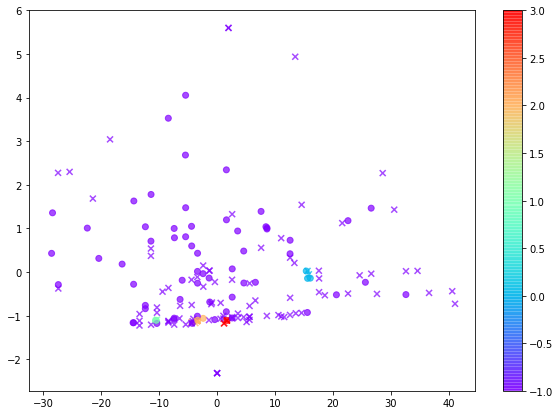

In [302]:
plt.figure(figsize=(10,7))
plt.scatter(tst_pca[y_test==0,0],tst_pca[y_test==0,1], marker='x', c=y_dbs[y_test==0], cmap=plt.cm.rainbow, alpha=0.7);
plt.scatter(tst_pca[y_test==1,0],tst_pca[y_test==1,1], marker='o', c=y_dbs[y_test==1], cmap=plt.cm.rainbow, alpha=0.7);
plt.colorbar();

# Lab 5

In this lab we talk about some advanced topics to improve our predictions.

## Feature Selection

Which feature are more important and which ones are not important?

http://scikit-learn.org/stable/modules/feature_selection.html

In [303]:
from sklearn import feature_selection

### SelectFromModel

In [ ]:
mdl = svm.LinearSVC(penalty='l1', dual=False).fit(X_train, y_train)

In [ ]:
#np.sort(np.abs(mdl.coef_))

In [ ]:
feature_selector = feature_selection.SelectFromModel(estimator=mdl, prefit=True, threshold=0.1)

In [ ]:
X_train1 = feature_selector.transform(X_train)

In [ ]:
pd.DataFrame(X_train1).head()

In [ ]:
X_train.head()

In [ ]:
print ("Original number of features:",X_train.shape[1])
print ("Selected number of features:",X_train1.shape[1])

### Recursive Feature Elimination (RFE)

In [ ]:
rfe = feature_selection.RFE(estimator=mdl, verbose=1)

In [ ]:
rfe.fit(X_train,y_train)

In [ ]:
sorted(zip(rfe.ranking_, X_train.columns))

## Over-fitting, Under-fitting

In [304]:
train_score = []
test_score = []
c_range = np.logspace(-3,4,50) 
for c in c_range:
    #print ('.',)
    mdl = svm.SVC(C=c)
    mdl.fit(X_train, y_train)
    y_fit = mdl.predict(X_train)
    y_pred = mdl.predict(X_test)
    train_score.append(metrics.f1_score(y_train, y_fit))
    test_score.append(metrics.f1_score(y_test, y_pred))

C:\Users\Shahab\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


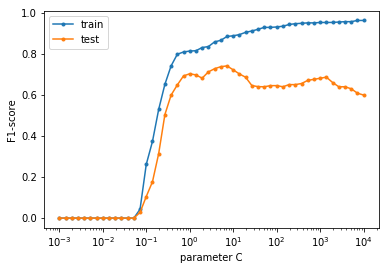

In [305]:
plt.semilogx(c_range[:len(train_score)], train_score,'.-');
plt.semilogx(c_range[:len(train_score)], test_score,'.-');
plt.legend(['train','test'])
plt.xlabel('parameter C')
plt.ylabel('F1-score')

### Q: Given the above graph, what's the best value of C?

In [306]:
#Chan Yu
c_range[:len(train_score)][np.argmax(test_score)]

7.1968567300115138

In [307]:
best_c = c_range[np.argmax(test_score)]
print ("Best C=",best_c)
print ("Best F1-score:",np.max(test_score))

Best C= 7.19685673001
Best F1-score: 0.742424242424


### Q: Which data is better to use for parameter tuning: test data or validation data?

## Model Selection

### Cross-Validation
http://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn import model_selection

In [ ]:
mdl = svm.SVC(C=1.0)
scores = model_selection.cross_val_score(mdl, X, y, cv=5, verbose=1, n_jobs=5, scoring="f1")

In [ ]:
scores

In [ ]:
print("Cross-Validated F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

### Cross-validation Iterators
#### K-fold

In [308]:
kf = model_selection.KFold(n_splits=5)
mdl = svm.SVC(C=1)

train_score = []
test_score = []
for train_idx, test_idx in kf.split(X):
    #print '.',
    X_trn = X.values[train_idx]
    X_tst = X.values[test_idx]
    y_trn = y.values[train_idx]
    y_tst = y.values[test_idx]
    mdl.fit(X_trn, y_trn)
    y_fit = mdl.predict(X_trn)
    y_pred = mdl.predict(X_tst)
    train_score.append(metrics.f1_score(y_trn, y_fit))
    test_score.append(metrics.f1_score(y_tst, y_pred))
   

In [309]:
print("Cross-Validated Train F1-Score: %0.2f (+/- %0.2f)" % (np.mean(train_score), np.std(train_score) ))

Cross-Validated Train F1-Score: 0.80 (+/- 0.02)


In [310]:
print("Cross-Validated Test F1-Score: %0.2f (+/- %0.2f)" % (np.mean(test_score), np.std(test_score) ))

Cross-Validated Test F1-Score: 0.72 (+/- 0.05)


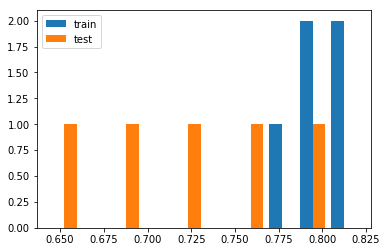

In [311]:
plt.hist([train_score, test_score]);
plt.legend(['train','test']);

#### StratifiedKFold

StratifiedKFold can be used to balance the splits if labels are unbalanced.

In [312]:
kf = model_selection.StratifiedKFold(n_splits=50)
mdl = svm.SVC(C=1)

train_score = []
test_score = []
for train_idx, test_idx in kf.split(X, y):
    #print '.',
    X_trn = X.values[train_idx]
    X_tst = X.values[test_idx]
    y_trn = y.values[train_idx]
    y_tst = y.values[test_idx]
    mdl.fit(X_trn, y_trn)
    y_fit = mdl.predict(X_trn)
    y_pred = mdl.predict(X_tst)
    train_score.append(metrics.f1_score(y_trn, y_fit))
    test_score.append(metrics.f1_score(y_tst, y_pred))

In [313]:
print("Cross-Validated Train F1-Score: %0.2f (+/- %0.2f)" % (np.mean(train_score), np.std(train_score) ))

Cross-Validated Train F1-Score: 0.80 (+/- 0.00)


In [314]:
print("Cross-Validated Test F1-Score: %0.2f (+/- %0.2f)" % (np.mean(test_score), np.std(test_score) ))

Cross-Validated Test F1-Score: 0.73 (+/- 0.12)


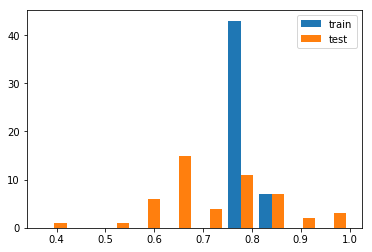

In [315]:
plt.hist([train_score, test_score]);
plt.legend(['train','test']);

### Parameter Tuning
http://scikit-learn.org/stable/modules/grid_search.html

In [316]:
def report(clf):
    print("Best parameters set found on development set:")
    print()
    print (clf.best_params_)
    print()
    print ("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print ("Detailed classification report:")
    print()
    print ("The model is trained on the full development set.")
    print ("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print (metrics.classification_report(y_true, y_pred))
    print()

#### Exhaustive Grid Search

Tip: split data to development_set (to be fed to the GridSearchCV instance) and an evaluation_set

In [317]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.5, random_state=0)

In [318]:
#not recommended. takes a long time.
# tuned_parameters = {'kernel': ['rbf','linear'], 'C': [0.1, 1, 10]}
# clf = model_selection.GridSearchCV(svm.SVC(), tuned_parameters, verbose = 2, n_jobs=-1)
# clf.fit(X_train, y_train)
# report(clf)

#### RandomizedSearchCV

In [319]:
tuned_parameters = {'kernel': ['rbf','linear'], 
                    'C': [0.01, 0.1, 1, 10, 100], 
                    'gamma': ['auto',0.01, 1]}

random_search = model_selection.RandomizedSearchCV(svm.SVC(), verbose= 2,
                                                   param_distributions=tuned_parameters, 
                                                   n_iter=3)

random_search.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   0.0s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....................... kernel=rbf, gamma=1, C=0.1, total=   0.0s
[CV] kernel=linear, gamma=auto, C=0.01 ...............................
[CV] ................ kernel=linear, gamma=auto, C=0.01, total=   0.0s
[CV] kernel=linear, gamma=auto, C=0.01 ...............................
[CV] ................ kernel=linear, gamma=auto, C=0.01, total=   0.0s
[CV] kernel=linear, gamma=auto, C=0.01 ...............................
[CV] ................ kernel=linear, gamma=auto, C=0.01, total=   0.0s
[CV] kernel=rbf, gamma=0.01, C=10 ....................................
[CV] .............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'kernel': ['rbf', 'linear'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['auto', 0.01, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [320]:
report(random_search)

Best parameters set found on development set:

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

Grid scores on development set:

0.618 (+/-0.006) for {'kernel': 'rbf', 'gamma': 1, 'C': 0.1}
0.779 (+/-0.047) for {'kernel': 'linear', 'gamma': 'auto', 'C': 0.01}
0.820 (+/-0.019) for {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       283
          1       0.78      0.72      0.75       163

avg / total       0.82      0.82      0.82       446




## Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [ ]:
clf = linear_model.LogisticRegression()
sc = preprocessing.StandardScaler()
pipe_model = Pipeline([('scaler', sc), ('lr', clf)])
pipe_model.fit(X_train, y_train)

In [ ]:
y_pred = pipe_model.predict(X_test)

In [ ]:
print (metrics.classification_report(y_test,y_pred))